In [37]:
import matplotlib.pyplot as plt
import json
import argparse
import numpy as np
import seaborn as sns

from plot_utils import extract_measures, extract_utterance, get_distributions, get_x_positions, order_lists, plot_reward, plot_training_curve 
# from plot_graphs import plot_reward  

sns.set()
# plt.set
# plt.figure.

%matplotlib inline

dir_ = 'final/new/'

filenames = {
    'self_both': dir_ + 'log_20191108_202416final_self.log',
    'self_linguistic': dir_ +'log_20191105_181425final_self_disable-proposal.log',
    'self_proposal': dir_ + 'log_20191106_174032final_self_disable-comms.log',
#     'self_none': dir_ + '',
    
    'prosoc_both': dir_ + 'log_20191103_201228final_prosoc.log',
    'prosoc_linguistic': dir_ + 'log_20191104_193106final_prosoc_disable-proposal.log',
    'prosoc_proposal': dir_ + 'log_20191104_145248final_prosoc_disable-comms.log',
    'prosoc_none': dir_ + 'log_20191105_102406final_prosoc_disable-proposal_disable-comms.log'  
}

filenames_memory_comp = {
    'prosoc_none': 'log_20191108_182251final_prosoc_disable-proposal_disable-comms_memory-comp.log'
}
output_dir = 'figs/'

ImportError: cannot import name 'plot_reward'

In [21]:
def plot_reward_all(filenames):
    socialities = ['self', 'prosoc']
    channels = ['proposal', 'linguistic', 'both', 'none']
    
    for sociality in socialities:
        for channel in channels:
            key = sociality + '_' + channel
            print(key)
            filename = filenames[key] if key in filenames else None
            
            if filename:
                output = '{}reward_{}.png'.format(output_dir, key)
                plot_reward(filename, 0, 1, key, 200000, labels=None, output_file=output)
            

self_proposal
final/new/log_20191106_174032final_self_disable-comms.log meta: {"enable_proposal": true, "enable_comms": false, "prosocial": false, "seed": null}

self_linguistic
final/new/log_20191105_181425final_self_disable-proposal.log meta: {"enable_proposal": false, "enable_comms": true, "prosocial": false, "seed": null}

self_both
final/new/log_20191102_173823final_fixed_disable-prosocial.log meta: {"enable_proposal": true, "enable_comms": true, "prosocial": false, "seed": null}

self_none
final/new/log_20191107_200112final_prosoc_disable-proposal_disable-comms.log meta: {"enable_proposal": false, "enable_comms": false, "prosocial": true, "seed": null}

prosoc_proposal
final/new/log_20191104_145248final_prosoc_disable-comms.log meta: {"enable_proposal": true, "enable_comms": false, "prosocial": true, "seed": null}

prosoc_linguistic
final/new/log_20191104_193106final_prosoc_disable-proposal.log meta: {"enable_proposal": false, "enable_comms": true, "prosocial": true, "seed": null

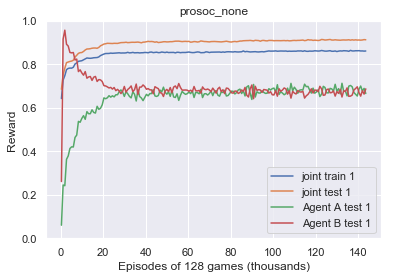

In [22]:
plot_reward_all(filenames)

In [5]:
def joint_reward_success(**kwargs):

    """
    FOR TABLE 2
    
    keys:
    self_proposal, self_linguistic, self_both, self_none,
    prosoc_proposal, prosoc_linguistic, prosoc_both, prosoc_none
    
    values:
    filenames
    
    Joint reward success and average number of turns taken for paired agents negotiating
    with random game termination, varying the agent reward scheme and communication channel.
    """
    
    from_paper = {'self_proposal': 0.87, 'self_linguistic': 0.75, 'self_both': 0.87, 'self_none': 0.77,
                  'prosoc_proposal': 0.93,  'prosoc_linguistic': 0.99, 'prosoc_both': 0.92, 'prosoc_none': 0.95}
    
    socialities = ['self', 'prosoc']
    channels = ['proposal', 'linguistic', 'both', 'none']
    data = {}
    
    for sociality in socialities:
        for channel in channels:
            key = sociality + '_' + channel
            filename = kwargs.pop(key, None)
            
            if filename:
                extracted = extract_measures(filenames[key], ['test_reward'])
                joint_reward = np.mean(extracted['test_reward'])

            else:
                joint_reward = -1
            data[key] = {'joint_reward': joint_reward}
            
    for sociality in socialities:
        for channel in channels:
            key = sociality + '_' + channel
            print(sociality + ' ' + channel)
            print('\tour:       {}'.format(data[key]['joint_reward']))
            print('\tfrom paper: {}'.format(from_paper[key]))
    return data
    
    

In [8]:
joint_reward_success(**filenames)

self proposal
	our:       0.7703159322815518
	from paper: 0.87
self linguistic
	our:       0.7072781976477203
	from paper: 0.75
self both
	our:       0.5517489698879858
	from paper: 0.87
self none
	our:       0.9019430694684956
	from paper: 0.77
prosoc proposal
	our:       0.7790770780996942
	from paper: 0.93
prosoc linguistic
	our:       0.8980245588928781
	from paper: 0.99
prosoc both
	our:       0.862141500748424
	from paper: 0.92
prosoc none
	our:       0.8971908869516586
	from paper: 0.95


{'prosoc_both': {'joint_reward': 0.862141500748424},
 'prosoc_linguistic': {'joint_reward': 0.8980245588928781},
 'prosoc_none': {'joint_reward': 0.8971908869516586},
 'prosoc_proposal': {'joint_reward': 0.7790770780996942},
 'self_both': {'joint_reward': 0.5517489698879858},
 'self_linguistic': {'joint_reward': 0.7072781976477203},
 'self_none': {'joint_reward': 0.9019430694684956},
 'self_proposal': {'joint_reward': 0.7703159322815518}}

In [32]:
def plot_training_curve_all(filenames):
    """
    FOR FIGURE 2a
    
    Training curves for SELF-INTERESTED agents learning to negotiate under the various com- munication channels.
    """
    
    socialities = ['self']
    channels = ['proposal', 'linguistic', 'both', 'none']
    
    for sociality in socialities:
        for channel in channels:
            key = sociality + '_' + channel
            filename = filenames[key] if key in filenames else None
            print(key)
            if filename:
                print(key)
                output = '{}training_curve_{}.png'.format(output_dir, key)
                plot_training_curve(filename, min_y=0, max_y=1, title='', max_x=200000, labels=None, output=output)
        

In [33]:
output_dir

'figs/'

self_proposal
self_proposal
self_linguistic
self_linguistic
self_both
self_none


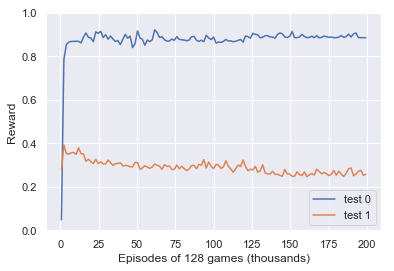

In [34]:
plot_training_curve_all(filenames)
# plot_training_curve(filenames['self_both'])

In [39]:
def plot_utterance(distribution, turn, vocab_len=10, utter_len=6):
    labels = [str(i) for i in range(utter_len)]
    
    x = np.arange(utter_len)
    width = 4
    positions = get_x_positions(vocab_len, utter_len, width=width, outer_width=2).T
    
    fig, ax = plt.subplots()
    reacts = []
    
    for i in range(vocab_len):
        values = distribution[turn, :, i]
        l = positions[i]
        print('lens', len(l), values.shape)
        reacts.append(ax.bar(l, values, width, label=str(i)))
    ax.legend()
        
    def autolabel(rects):
        """
        Attach a text label above each bar in *rects*, displaying its height.
        from: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
        """
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    ax.set_ylabel('Occurance')
    ax.set_title('Symbols distribution in position')
#     ax.set_xticks(np.arange(labels))
    ax.set_xticklabels(labels)
    fig.tight_layout()


def unigram_statistics(filenames):
    """
    FOR FIGURE 3a
    
    Unigram statistics of symbol usage broken down by turn and by position within the utterance
    for prosocial agents communicating via the linguistic channel.
    """
    
    pass


lens 6 (6,)
lens 6 (6,)
lens 6 (6,)
lens 6 (6,)
lens 6 (6,)
lens 6 (6,)
lens 6 (6,)
lens 6 (6,)
lens 6 (6,)
lens 6 (6,)


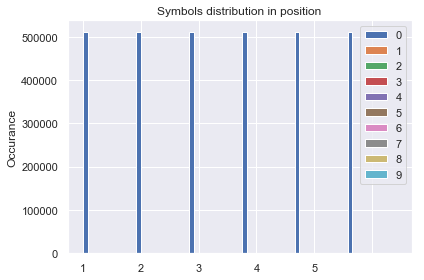

In [40]:
extracted = extract_utterance(filenames['prosoc_both'])
distribution = get_distributions(extracted)
plot_utterance(np.array(distribution), 0)

In [ ]:
def bigram_statistics(filenames):
    """
    FOR FIGURE 3b
    
    Bigram counts for prosocial agents communicating via the linguistic channel, sorted by frequency.
    """
    filename = filenames['prosoc_linguistic']
    extracted = extract_utterance(filename)
    extracted_a = extracted[::2]
    extracted_b = extracted[1::2]
    extracted_a = np.array([list(map(str, msg)) for sublist in extracted_a for msg in sublist])
    extracted_b = np.array([list(map(str, msg)) for sublist in extracted_b for msg in sublist])

    bigrams_a = []
    bigrams_b = []
    for i in range(extracted_a.shape[1] - 1):
        new_bigrams_a = list(np.core.defchararray.add(extracted_a[:, i], extracted_a[:, i + 1]))
        new_bigrams_b = list(np.core.defchararray.add(extracted_b[:, i], extracted_b[:, i + 1]))
        bigrams_a += new_bigrams_a
        bigrams_b += new_bigrams_b

    unique, counts = np.unique(bigrams_b, return_counts=True)
    counts, unique = order_lists(counts, unique)
    x = np.arange(len(counts))
    plt.bar(x, counts)

bigram_statistics(filenames)